In [ ]:
pip install pytorch-tabnet

In [ ]:
 pip install imbalanced-learn

In [ ]:
pip install tsne

     |████████████████████████████████| 552kB 24.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tsne: filename=tsne-0.3.1-cp37-cp37m-linux_x86_64.whl size=260482 sha256=e979c270ac532f6a8424de16caa61797ab75017d9683c488fe286210dfd976d7
  Stored in directory: /root/.cache/pip/wheels/3e/d6/fc/58392f18ea8fc4c74e20185d2faeee87a1c1924a182606c6cd
Successfully built tsne


In [ ]:
import pandas as pd
#from tabnet import TabNet, TabNetClassifier
#from tabnet import TabNet, TabNetClassifier
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import imblearn
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#import umap
import random 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import FastICA, PCA, FactorAnalysis
from sklearn.metrics import roc_auc_score, recall_score, f1_score, classification_report, accuracy_score,roc_curve, confusion_matrix, auc,precision_score, log_loss
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data_icu = pd.read_csv('ICUMICE2754.csv')
data_icu.head()

,Age,Gender..female.0..male1.,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea.Vomiting,Sore.throat,Runny.nose.Nasal.congestion,Loss.of.smell,Loss.of.taste,Headahce,Chest.discomfort..chest.pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D.dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic.BP,Temperature,Troponin,ICU.or.not
0,23,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,2.2,857,203.9,117,345,40.6,96,0.28,18,89,37.0,0.01,1
1,25,1,3,7,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,37,11.7,183,587.1,132,483,6.8,98,0.64,28,107,39.5,0.01,1
2,28,1,2,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,22.0,389,932.1,124,562,10.4,88,1.81,17,123,39.1,0.01,1
3,28,1,1,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,10.5,370,2068.0,123,706,13.4,94,0.92,20,120,38.9,0.01,1
4,30,1,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,6.7,349,2141.0,101,688,17.9,98,0.37,15,130,37.1,0.01,1


In [ ]:
data_icu.columns = data_icu.columns.str.replace('.','_')
data_icu = data_icu.rename(columns={'Gender__female_0__male1_':'Gender'})
data_icu.head()

,Age,Gender,ethnicity,race,Fever,Cough,SOB,Fatigue,Sputum,Myalgia,Diarrhea,Nausea_Vomiting,Sore_throat,Runny_nose_Nasal_congestion,Loss_of_smell,Loss_of_taste,Headahce,Chest_discomfort__chest_pain,Asymptomatic,smoking_history,hypertensionhx,diabeteshx,asthmahx,coronaryheartdiseasehx,copdhx,heartfailurehx,carcinomahx,immunosuppressionhx,ckdhx,ALT,CRP,D_dimer,Ferritin,HR,LDH,Lymphocyte,SpO2,Procalcitonin,RR,Systolic_BP,Temperature,Troponin,ICU_or_not
0,23,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,31,2.2,857,203.9,117,345,40.6,96,0.28,18,89,37.0,0.01,1
1,25,1,3,7,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,37,11.7,183,587.1,132,483,6.8,98,0.64,28,107,39.5,0.01,1
2,28,1,2,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,22.0,389,932.1,124,562,10.4,88,1.81,17,123,39.1,0.01,1
3,28,1,1,7,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,10.5,370,2068.0,123,706,13.4,94,0.92,20,120,38.9,0.01,1
4,30,1,2,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218,6.7,349,2141.0,101,688,17.9,98,0.37,15,130,37.1,0.01,1


In [ ]:
X = data_icu.drop(columns='ICU_or_not')
y= data_icu['ICU_or_not']

In [ ]:
ada = ADASYN(random_state=0, n_neighbors=20)
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({1: 836, 0: 835})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
smote = SMOTE(random_state=0)
X_resm, y_resm = ada.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_resm)))

Resampled dataset shape Counter({1: 836, 0: 835})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
transformer = FastICA(random_state=0)
X_transformed = transformer.fit_transform(X_res)
X_transformed.shape

(1671, 42)

In [ ]:
transformer = PCA(random_state=0)
X_transformed0 = transformer.fit_transform(X_res)
X_transformed0.shape

(1671, 42)

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_res, 
                                                        test_size=0.1, random_state=80)
target = data_icu['ICU_or_not']
skf = StratifiedKFold(n_splits=5)
fold_no = 1
for train_index, test_index in skf.split(data_icu, target):
  train = data_icu.loc[train_index,:]
  test = data_icu.loc[test_index,:]
  print('Fold',str(fold_no),'Class Ratio:',sum(test['ICU_or_not'])/len(test['ICU_or_not']))
  fold_no += 1
def train_model(train, test, fold_no):
  
  
  clf = TabNetClassifier(n_d=64,n_shared=2,mask_type='entmax', momentum=0.3,n_steps=3,n_independent=2,lambda_sparse=0.003,gamma=2.7)
  clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'test'],
    eval_metric=['auc'], max_epochs=200, batch_size=128, patience=60
  
  )
  predictions = clf.predict(X_test)
  #print('Fold',str(fold_no),'Accuracy:',recall_score(y_test,predictions))
  print('Roc score is',np.mean(roc_auc_score(y_test,predictions)))
  print('f1 score is'np.mean(f1_score(y_test,predictions)))
  print('accuracy score is'np.mean(accuracy_score(y_test,predictions)))
  print('recall score is'np.mean(recall_score(y_test,predictions)))
  print('precision score is'np.mean(precision_score(y_test,predictions)))   
import numpy as np

fold_no = 1
for train_index, test_index in skf.split(data_icu, target):
  train = data_icu.loc[train_index,:]
  test = data_icu.loc[test_index,:]
  train_model(train,test,fold_no)
  fold_no += 1 

In [ ]:
tab_pred = clf.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

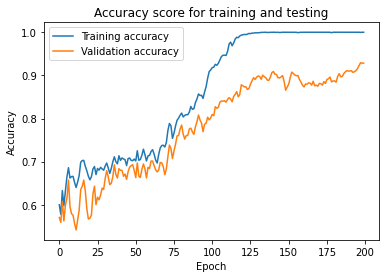

In [ ]:
# plot auc
import matplotlib.pyplot as plt
from google.colab import files

plt.plot(clf.history['train_auc'],  label='Training accuracy')
plt.plot(clf.history['test_auc'],label='Validation accuracy')
plt.rcParams["figure.figsize"]=(8, 7)
plt.title('Accuracy score for training and testing')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('trvalicu.pdf', transparent=True,dphi=300)
files.download("trvalicu.pdf");

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

def plot_feature_importance(importance,names,model_type):


  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data_icu={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data_icu)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True,)

  #Define size of bar plot
  plt.figure(figsize=(11,11))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title('FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURES')
  plt.savefig('featimpicu.pdf', transparent=True,dphi=300)
  files.download("featimpicu.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

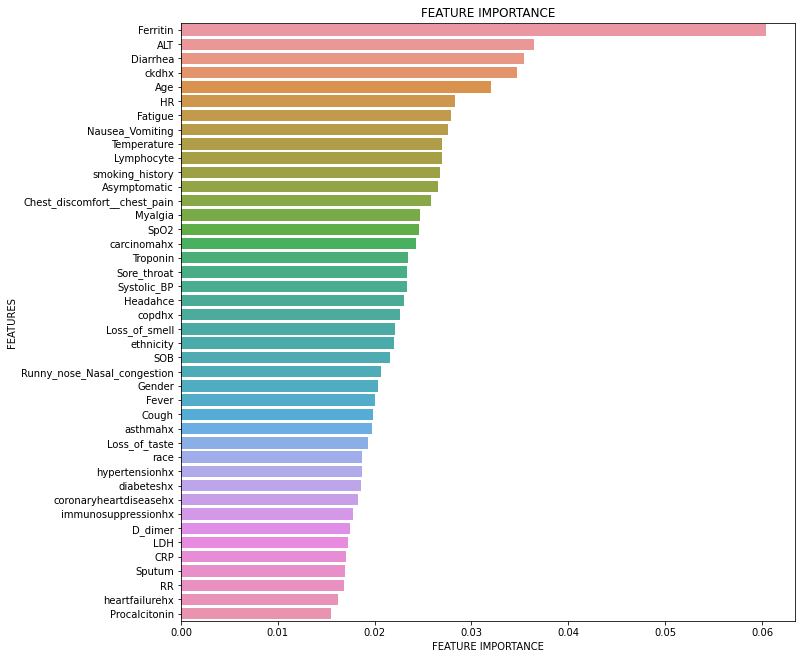

In [ ]:
plot_feature_importance(clf.feature_importances_, X.columns,'TabNet')

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

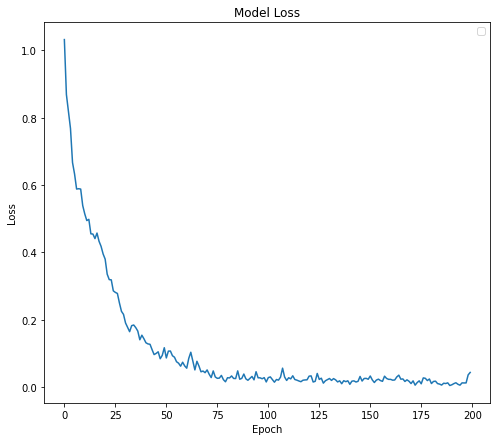

In [ ]:
# plot losses
import matplotlib.pyplot as plt
plt.plot(clf.history['loss'])
plt.rcParams["figure.figsize"]=(10, 10)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();
plt.savefig('iculoss.pdf', dpi=300)
files.download("iculoss.pdf")





In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import seaborn as sns

In [ ]:
clf_probs = clf.predict_proba(X_test)
clf_probs = clf_probs[:, 1]

In [ ]:
clf_precision, clf_recall, _ = precision_recall_curve(y_test, clf_probs)
clf_f1, clf_auc = f1_score(y_test, tab_pred), auc(clf_recall, clf_precision)

In [ ]:
print('TabNet: f1=%.3f auc=%.3f' % (clf_f1, clf_auc))

In [ ]:
plt.plot(clf_recall, clf_precision, marker='.',)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Proposed Model')
plt.legend()
plt.savefig('precallicu.pdf', transparent=True,dphi=300)
files.download("precallicu.pdf")

In [ ]:
explain_matrix, masks = clf.explain(X_test)

In [ ]:
from google.colab import files

In [ ]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(2,1, figsize=(15,15))
for i in range(2):
  axis[i].imshow(masks[i][:20])
  axis[i].set_title(f'masks{i}')
  fig.suptitle('Feature Importance Masks')
plt.savefig('masksicu.pdf', transparent=True,dphi=300)
files.download("masksicu.pdf")   

In [ ]:
cm = confusion_matrix(y_test, tab_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm, display_labels=['ICU','No ICU'])
cmd.plot()
plt.savefig('confmatrixicu.pdf', transparent=True,dphi=300)
files.download("confmatrixicu.pdf")   